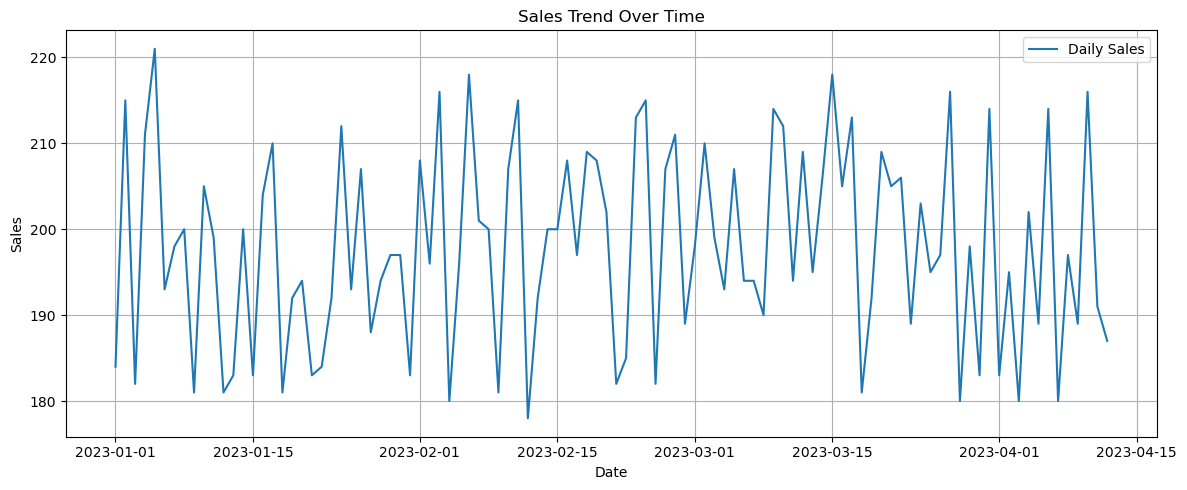

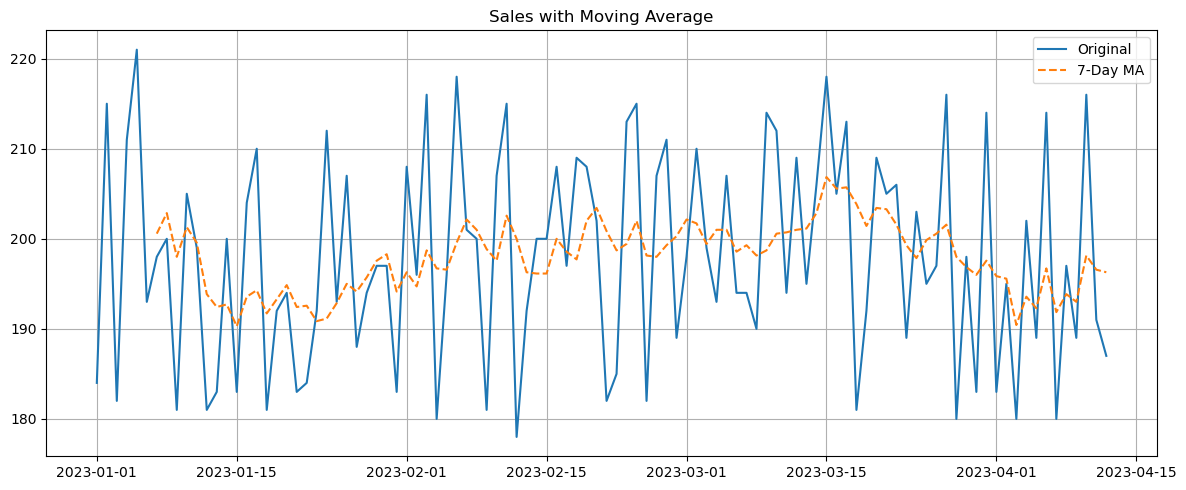


Model Evaluation:
RMSE: 12.81
MAPE: 5.69%


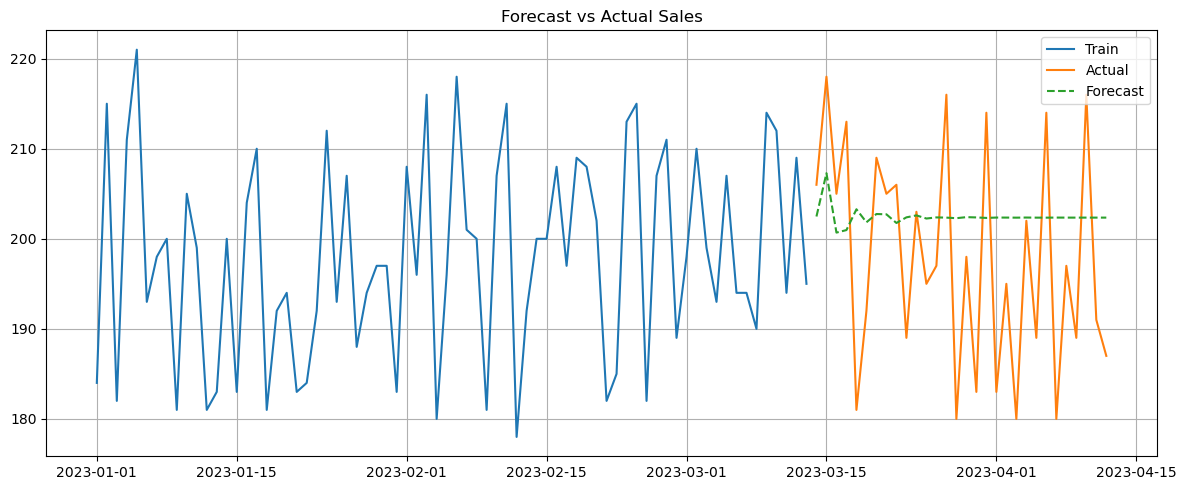

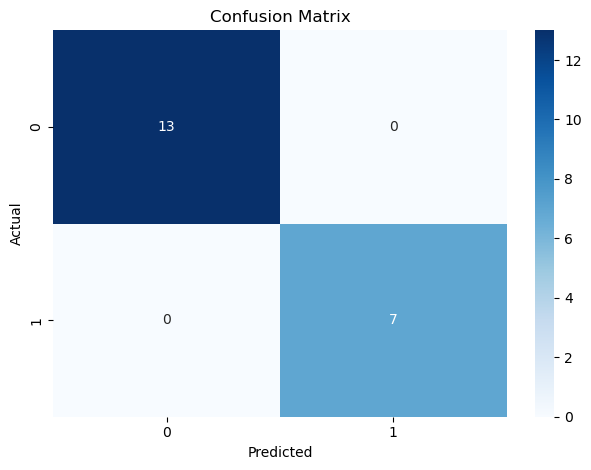


Classification Report:
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00        13
 Has Disease       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [3]:
#TASK 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")
#Load the dataset
df = pd.read_csv("Salesdata.csv") 
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('D') 
# Fill missing values if any
df['Sales'] = df['Sales'].interpolate()
# Visualize Sales Trends
plt.figure(figsize=(12, 5))
plt.plot(df['Sales'], label='Daily Sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('sales_trend_plot.png')
plt.show()
# Moving average
df['Sales_MA_7'] = df['Sales'].rolling(window=7).mean()
plt.figure(figsize=(12, 5))
plt.plot(df['Sales'], label='Original')
plt.plot(df['Sales_MA_7'], label='7-Day MA', linestyle='--')
plt.title('Sales with Moving Average')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('sales_moving_avg_plot.png')
plt.show()
#Split the data
train = df.iloc[:-30]
test = df.iloc[-30:]
# Build ARIMA model
model = ARIMA(train['Sales'], order=(5, 1, 0))  # (p,d,q) can be adjusted
model_fit = model.fit()
# Forecast
forecast = model_fit.forecast(steps=30)
forecast.index = test.index
# Evaluate
rmse = np.sqrt(mean_squared_error(test['Sales'], forecast))
mape = mean_absolute_percentage_error(test['Sales'], forecast)
print(f"\nModel Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
# Plot Forecast vs Actual
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index, test['Sales'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title('Forecast vs Actual Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('forecast_vs_actual.png')
plt.show()
#Save forecast as CSV
output = pd.DataFrame({'Date': forecast.index, 'Forecasted_Sales': forecast.values})
output.to_csv("forecasted_sales.csv", index=False)


#TASK 2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
#Load the dataset
df = pd.read_csv("heart_disease.csv")
# Handle missing and duplicate data
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
# Encode categorical data
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0
# Feature Scaling
scaler = StandardScaler()
features = ['Age', 'Cholesterol', 'Blood_Pressure']
df[features] = scaler.fit_transform(df[features])
# Split data
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Has Disease']))

